<a href="https://colab.research.google.com/github/zyavuz610/laboratory_apps_inKTU/blob/master/1_computer_org_lab/adc/analog_digital_converter(ADC).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analog-Dijital Dönüştürücü - (ADC)
## Giriş
* **ADC Nedir?:** Analog işaretleri sayısal işaretlere dönüştüren elektronik devrelere Analog-Digital Dönüştürücü denilmektedir.
* **Neden ADC?:**  
  * Analog işaretler analog donanım kullanılarak işlenebilir. Analog donanım üzerinde herhangi bir değişiklik ya da iyileştime yapmak hem masraflı hem de zaman alıcı bir işlemdir. Oysaki yazılım düzeyinde değişiklik yapmak oldukça kolaydır. Bu yüzden yazılım olarak işlenebilecek işaretler bir A/D dönüştürücü üzerinden sayısal işaretlere dönüştürülür ve değişiklik işlemi sadece yazılım üzerinde yapılır.
  * Maksimum ve minimum sınırları arasında farklı değerler alarak değişen elektriksel büyüklüklere analog bilgi ya da analog değer denir. Akım ve gerilim analog değerlerdir. Büyüklüklerin gerilim “var” veya “yok” anlamına gelen “1” ve “0” şeklinde iki rakam kullanılarak ifade edilmesine dijital bilgi ya da dijital değer denir. Sensörler çıkışlarında genellikle analog değer bulunur. Mikroişlemci ile çalışan elektronik cihazlar sadece dijital bilgileri alıp değerlendirebilir. Bu durumda mikroişlemcili ve dijital birçok cihaz için analog bilgilerin dijital bilgilere dönüştürülmesi gerekir. İşte sensörlerden elde edilecek ve analog olan bu gerilim değerlerinin sayısal sistemlerde yazılımla işlenebilmesi için sayısal dönüşümü için Analog-Digital dönüştürücüler kullanılmaktadır.
* **ADC nerede kullanılır?:** Analog-Digital dönüştürücüler günümüzde değişik amaçlar için birçok elektronik cihaz (sayısal osiloskop, multimetre, mikro-kontrol üniteleri, ses kartı) içerisinde kullanılmaktadır. Bu elektronik cihazlar, fiziksel değişimleri çeşitli sensörler (duyargalar) ile algılayıp kontrol edilmesini sağlar. Sensörler, ağırlık, uzunluk, ışık şiddeti, sıcaklık, basınç, debi gibi fiziksel büyüklükleri, bunlarla orantılı akım veya gerilim cinsinden elektriksel değerlere dönüştürür.
* **ADC dönüştürme yöntemleri:** Deneyde anlatılan 2 farklı ADC yöntemi mevcuttur. 1) Rampa Yöntemi, 2) Ardışıl Yaklaşım Yöntemi. Bunların dışında Flash ADC, tek eğimli, çift eğimli, sigma-delta, pipeline gibi farklı yöntemler de mevcuttur

## ADC devrelerinin genel yapısı
![ADC0](https://github.com/zyavuz610/logic_design_inKTU/blob/master/1_computer_org_lab/adc/ADC-working.jpg?raw=true) 

## ADC devrelerinin kabaca iç yapısı
![ADC](https://github.com/zyavuz610/logic_design_inKTU/blob/master/1_computer_org_lab/adc/8bit_adc_block_diagram.png?raw=true) ![Sekil 2](https://github.com/zyavuz610/logic_design_inKTU/blob/master/1_computer_org_lab/adc/adc_sekil2.PNG?raw=true)
* Şekil 2'de bir çelişki var mı?
* Şekil 2'nin girişi, çıkışı?
* Şekil 2'ye göre ADC nasıl çalışır?



## Şekil 2 nin Kabaca İç Yapısı ve Rampa Yöntemi Temsili
![ADC2](https://github.com/zyavuz610/laboratory_apps_inKTU/blob/master/1_computer_org_lab/adc/adc.gif?raw=true)

## Örnekleme ve Kuantalama
* Analog değerler zamana göre sürekli (kesintisiz) olduğundan, tüm zaman dilimlerine karşılık gelen bir analog gerilim değeri vardır. 
* Her analog değer için bir dijital değer oluşturmak çok maliyetli ve karmaşık olacağından uygulamada pratik değildir. 
* Bu nedenle analog değer üzerinden belirli zaman aralıklarında örnekler alınır. Bu işleme örnekleme denir. 
* Her örnek için seviyesine göre kodlanmış dijital bir değer üretilir. Bu işleme de kuantalama (kodlama) denilmektedir. 
* Kısaca ADC devrelerin çalışmasını **“örnekle, karşılaştır, dijital olarak kodla”** şeklinde özetlenebilir. 
* Aşağıda örnekleme ve kuantalama  konusu python kaynak kodları ile karşılatırmalı olarak verilmiştir.
  * Farklı örnekleme frekanlarını deneyiniz.

### Örnekleme


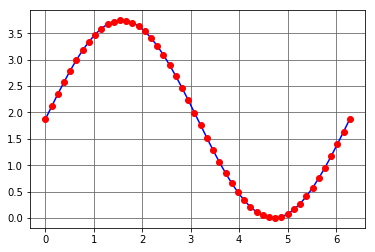

In [0]:
# ÖRNEKLEME
import numpy as np
import matplotlib.pyplot as plt

sf = 50                 # kaç örnek alınacak

pi_n = 1                # grafikteki pi sayısı
A    = 1                # grafiğin dikey öteleme miktarı
Gmin = 0               # grafiğin min değeri    
Glen = 3.75             # grafiğin dikey büyüklüğü
Gmax = Gmin + Glen
scale = Glen/2.      # ölçekleme parametresi

x   = np.linspace(0,pi_n*2*np.pi,1000)
y   = scale * (np.sin(x) + A) + Gmin
x2  = np.linspace(0,pi_n*2*np.pi,sf)
y2  = scale * (np.sin(x2) + A) + Gmin
plt.plot(x,y,"b-",x2,y2,"ro")
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.show()

### Kuantalama
* Burada önemli 2 parametre vardır.
* **Çözünürlük (n):**  ADC’nin analog girişindeki en küçük değer değişimine karşılık çıkışında dijital farklılık oluşturma yeteneğidir.  Uygulamada ADC’ler için çözünürlük denildiğinde çıkıştaki bit sayısı akla gelmektedir.  Çeşitli üretici firmalar tarafından 8, 10, 12, 14, 15, 16, 18, 20, 24 bit çözünürlükte değişik ADC entegreleri üretilmiştir.  Dijital çıkışın bit sayısının fazla olması çözünürlüğü artırır.  Analog-dijital dönüştürücüde daha hassas değerler elde etmek için çözünürlüğün yüksek olması istenir. 
* **Quantum Seviyesi (Bölüntü Seviyesi, q):** ADC girişine uygulanan analog sinyal, minimum ve maksimum genlik değerleri arasında eşit aralıklara bölünür.  Her aralık dijital çıkışta bir bitlik değişime neden olur.  Örneğin  “n”  sayıda dijital çıkışı olan bir ADC 2^n adet ayrık quantum seviyesine sahip demektir. Girişteki analog sinyalin minimum-maksimum arası (2^n-1) adet eşit parçaya bölünmüş olur. 
  * q=(Vmax-Vmin)/(2^n-1)
* aşağıda farklı çözünürlük, Vmin, Vmax değerlerini deneyiniz, sonuçları karşılaştırınız ve yorumlayınız.
* **Uyarı!:* önce örneklemeyi çalıştırın, daha sonra quantalamayı çalıştırın

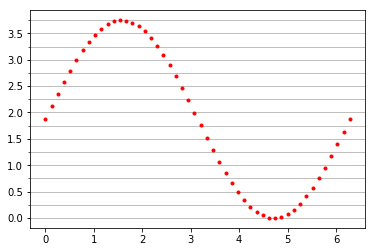

In [0]:
# quantalama
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
sf = 50                 # kaç örnek alınacak
pi_n = 1                # grafikteki pi sayısı
A    = 1                # grafiğin dikey öteleme miktarı
rn = 2
#############################################################
# PARAMETRELER
n = 4           # çözünürlük
Gmin = 0               # grafiğin min değeri    
Glen = 3.75             # grafiğin dikey büyüklüğü
Gmax = Gmin + Glen
#############################################################
scale = Glen/2.      # ölçekleme parametresi
q = round((Gmax-Gmin)/(2**n - 1),rn) 
minor_ticks = np.arange(Gmin, Gmax+1, q)
ax.set_yticks(minor_ticks, minor=True)
ax.grid(which='minor')
x2  = np.linspace(0,pi_n*2*np.pi,sf)
y2  = scale * (np.sin(x2) + A) + Gmin
plt.plot(x2,y2,"r.")
plt.show()

Vmin	-5.0
Vmax	5.0
n	6
q	0.1587


Va	SB	Vd	Vo
-----------------------------
1.7	000001	-4.8413	-6.5413
1.7	000010	-4.6826	-6.3826
1.7	000011	-4.5239	-6.2239
1.7	000100	-4.3652	-6.0652
1.7	000101	-4.2065	-5.9065
1.7	000110	-4.0478	-5.7478
1.7	000111	-3.8891	-5.5891
1.7	001000	-3.7304	-5.4304
1.7	001001	-3.5717	-5.2717
1.7	001010	-3.413	-5.113
1.7	001011	-3.2543	-4.9543
1.7	001100	-3.0956	-4.7956
1.7	001101	-2.9369	-4.6369
1.7	001110	-2.7782	-4.4782
1.7	001111	-2.6195	-4.3195
1.7	010000	-2.4608	-4.1608
1.7	010001	-2.3021	-4.0021
1.7	010010	-2.1434	-3.8434
1.7	010011	-1.9847	-3.6847
1.7	010100	-1.826	-3.526
1.7	010101	-1.6673	-3.3673
1.7	010110	-1.5086	-3.2086
1.7	010111	-1.3499	-3.0499
1.7	011000	-1.1912	-2.8912
1.7	011001	-1.0325	-2.7325
1.7	011010	-0.8738	-2.5738
1.7	011011	-0.7151	-2.4151
1.7	011100	-0.5564	-2.2564
1.7	011101	-0.3977	-2.0977
1.7	011110	-0.239	-1.939
1.7	011111	-0.0803	-1.7803
1.7	100000	0.0784	-1.6216
1.7	100001	0.2371	-1.4629
1.7	100010	0.3958	-1.3042
1.7	100011	0.55

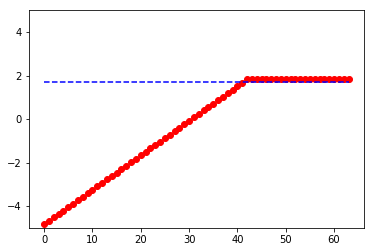

In [0]:
# rampa yöntemi
import numpy as np
import matplotlib.pyplot as plt

def mybin(num,n):
    s = ""
    while num > 0:
        m = num % 2
        num = num //2
        s = str(m) + s
        n = n - 1
    while n > 0:
        s = "0" + s
        n = n - 1
    return s

######################################################
# PARAMETRELER
Vmin    = -5.0
Vmax    = 5.0
Va      = 1.7                           # giriş
n       = 6                             # çözünürlük
######################################################

Vo = -1.        # başlangıçta çıkış (-)
i = 1
rn = 4          # yuvarlatma basamak sayısı
                       
#######################################################
# q = quantum                      
q = round((Vmax-Vmin)/(2**n - 1),rn)          
####################################################### 

gr = 1
grRampVd = np.zeros(2**n)
grRampVa = np.zeros(2**n)

print("Vmin",Vmin,sep="\t")
print("Vmax",Vmax,sep="\t")
print("n",n,sep="\t")
print("q",q,sep="\t")
print("\n")
print("Va","SB","Vd","Vo",sep='\t')
print("-----------------------------")
while Vo < 0:
    Vd = round(i*q + Vmin,rn)
    Vo = round(Vd - Va,rn)
    grRampVa[i-1] = Va
    grRampVd[i-1] = Vd
    print(Va,mybin(i,n),Vd,Vo,sep='\t')
    i = i+1
for i in range(i-1,2**n):
    grRampVa[i] = Va
    grRampVd[i] = Vd

err = round(Va - Vd,rn+2)
print("Hata",err)

if gr == 1:
    axes = plt.gca()
    axes.set_ylim([Vmin,Vmax])
    plt.plot(grRampVd,'ro',grRampVa,'b--')

Vmin	-2.55
Vmax	2.55
n	9
q	0.01


Adım	Va	SB		HEX	Vd	Vo
---------------------------------------------------------
1	1.29	100000000	0x100	0.01	-1.28
2	1.29	110000000	0x180	1.29	0.0
3	1.29	111000000	0x1c0	1.93	0.64
4	1.29	110100000	0x1a0	1.61	0.32
5	1.29	110010000	0x190	1.45	0.16
6	1.29	110001000	0x188	1.37	0.08
7	1.29	110000100	0x184	1.33	0.04
8	1.29	110000010	0x182	1.31	0.02
9	1.29	110000001	0x181	1.3	0.01
Hata -0.01


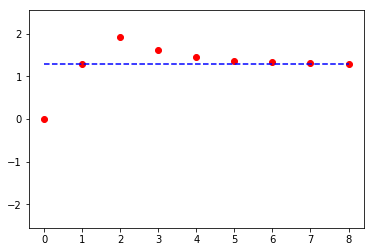

In [0]:
# ardışıl yaklaşım yöntemi
import numpy as np
import matplotlib.pyplot as plt

def mybin(num,n):
    s = ""
    while num > 0:
        m = num % 2
        num = num //2
        s = str(m) + s
        n = n - 1
    while n > 0:
        s = "0" + s
        n = n - 1
    return s

#####################################
# PARAMETRELER
Vmin    = -2.55
Vmax    = 2.55
Va      = 1.29        # giriş
n       = 9           # çözünürlük
#####################################

Vo = -1.        # başlangıçta çıkış (-)
rn = 4
i = n-1
                          
q = round((Vmax-Vmin)/(2**n - 1),rn)          # quantum

gr = 1
grRampVd = np.zeros(n)
grRampVa = np.zeros(n)

print("Vmin",Vmin,sep="\t")
print("Vmax",Vmax,sep="\t")
print("n",n,sep="\t")
print("q",q,sep="\t")
print("\n")
print("Adım","Va","SB","\tHEX","Vd","Vo",sep='\t')
print("---------------------------------------------------------")

base = 0
while i>=0:
    bias = 2**i
    Vd = round((base + bias) * q + Vmin,rn)
    Vo = round(Vd - Va,rn)

    grRampVa[n-i-1] = Va
    grRampVd[n-i-1] = Vd

    print(n-i,Va,mybin(base+bias,n),hex(base+bias),Vd,Vo,sep='\t')
    i = i - 1
    if Vo <= 0:
        base = base + bias

# son değerler
grRampVa[n-i-2] = Va
grRampVd[n-i-2] = Vd

err = round(Va - Vd,rn+2)
print("Hata",err)

if gr == 1:
    axes = plt.gca()
    axes.set_ylim([Vmin,Vmax])
    plt.plot(grRampVd,'ro',grRampVa,'b--')